<a href="https://colab.research.google.com/github/vermanaman419-prog/User-Interaction-Satisfaction-Analysis-of-Gen-AI-Model/blob/main/%F0%9F%93%8A_User_Interaction_%26_Satisfaction_Analysis_of_Generative_AI_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 User Interaction & Satisfaction Analysis of Gen AI Model

**🔹 STEP 1: Import Libraries & Load Dataset**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df = pd.read_csv("gen_ai_customer_interaction_dataset.csv")
df.head()


,customer_name,email,customer_age,country,subscription_type,question_category,response_time_seconds,customer_satisfaction_score,follow_up_question,access_device,language_used,gemini_model_version
0,Vihaan Chopra,vihaan.chopra341@yahoo.com,23.0,FRANCE,Subscriber,Coding,34.0,4.0,Yes,Web,Hindi,Gemini-1.5
1,Charlotte Smith,charlotte.smith612@yahoo.com,62.0,Canada,Subscriber,Travel,30.0,2.0,Yes,Web,Spanish,Gemini-Pro
2,William Mehta,william.mehta441@outlook.com,20.0,United States,FREE,General Knowledge,5.0,3.0,No,Android App,German,Gemini-1.0
3,Nikhil Smith,nikhil.smith323@gmail.com,51.0,NaN,SUBSCRIBER,Others,23.0,5.0,No,iOS App,French,Gemini-1.5
4,Ethan Hall,ethan.hall773@outlook.com,49.0,Singapore,FREE,Finance,44.0,1.0,Yes,iOS App,English,Gemini-1.5


**🔹 STEP 2: Initial Data Understanding**

In [34]:
#Dataset Shape & Info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_name                2060 non-null   object 
 1   email                        2060 non-null   object 
 2   customer_age                 1959 non-null   float64
 3   country                      1970 non-null   object 
 4   subscription_type            2060 non-null   object 
 5   question_category            2060 non-null   object 
 6   response_time_seconds        1959 non-null   float64
 7   customer_satisfaction_score  1958 non-null   float64
 8   follow_up_question           2060 non-null   object 
 9   access_device                2060 non-null   object 
 10  language_used                2060 non-null   object 
 11  gemini_model_version         2060 non-null   object 
dtypes: float64(3), object(9)
memory usage: 193.3+ KB


In [35]:
#Summary Statistics
df.describe(include="all")

,customer_name,email,customer_age,country,subscription_type,question_category,response_time_seconds,customer_satisfaction_score,follow_up_question,access_device,language_used,gemini_model_version
count,2060,2060,1959.000000,1970,2060,2060,1959.000000,1958.000000,2060,2060,2060,2060
unique,895,2011,NaN,22,4,23,NaN,NaN,2,3,5,3
top,Ananya Sharma,emma.smith849@outlook.com,NaN,Germany,Free,Others,NaN,NaN,Yes,Web,Hindi,Gemini-1.5
freq,9,2,NaN,186,1074,217,NaN,NaN,1035,705,461,734
mean,NaN,NaN,41.755487,NaN,NaN,NaN,36.066360,3.764556,NaN,NaN,NaN,NaN
std,NaN,NaN,15.966159,NaN,NaN,NaN,90.594443,1.142495,NaN,NaN,NaN,NaN
min,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,30.000000,NaN,NaN,NaN,13.000000,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,42.000000,NaN,NaN,NaN,20.000000,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,54.000000,NaN,NaN,NaN,29.000000,5.000000,NaN,NaN,NaN,NaN


**🔹 STEP 3: Data Cleaning**

In [36]:
#Remove Leading/Trailing Spaces
df["customer_name"] = df["customer_name"].str.strip()
df["email"] = df["email"].str.strip()

In [37]:
#Handle Duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [38]:
#Fix Casing Issues
df["subscription_type"] = df["subscription_type"].str.title()
df["question_category"] = df["question_category"].str.title()
df["country"] = df["country"].str.title()

In [39]:
#Fix Typos in Question Categories
category_corrections = {
    "Codng": "Coding",
    "Medcal": "Medical",
    "Life Style": "Lifestyle",
    "Finanace": "Finance",
    "Educatoin": "Education"
}

df["question_category"] = df["question_category"].replace(category_corrections)

In [40]:
#Handling Invalid Ages
df.loc[(df["customer_age"] < 18) | (df["customer_age"] > 80), "customer_age"] = np.nan
df["customer_age"].fillna(df["customer_age"].median(), inplace=True)

/tmp/ipython-input-1707690922.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["customer_age"].fillna(df["customer_age"].median(), inplace=True)


In [41]:
#Handling Missing Values
df["country"].fillna("Unknown", inplace=True)
df["response_time_seconds"].fillna(df["response_time_seconds"].median(), inplace=True)
df["customer_satisfaction_score"].fillna(df["customer_satisfaction_score"].median(), inplace=True)

/tmp/ipython-input-1220737512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["country"].fillna("Unknown", inplace=True)
/tmp/ipython-input-1220737512.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [42]:
#Treating Outliers
Q1 = df["response_time_seconds"].quantile(0.25)
Q3 = df["response_time_seconds"].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df["response_time_seconds"] >= Q1 - 1.5 * IQR) &
    (df["response_time_seconds"] <= Q3 + 1.5 * IQR)
]

**🔹 STEP 4: Feature Engineering**

In [43]:
df["age_group"] = pd.cut(
    df["customer_age"],
    bins=[18,25,35,45,55,80],
    labels=["18-25","26-35","36-45","46-55","56+"]
)

In [44]:
df["is_subscriber"] = df["subscription_type"].apply(lambda x: 1 if x == "Subscriber" else 0)

**🔹 STEP 5: Exploratory Data Analysis**

In [45]:
#User Distribution
df["subscription_type"].value_counts(normalize=True)

,proportion
subscription_type,
Free,0.571875
Subscriber,0.428125


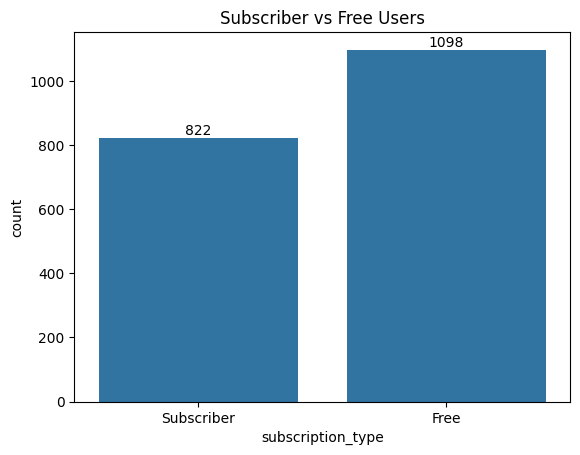

In [46]:
# User distribution countplot
ax = sns.countplot(data=df, x="subscription_type")
plt.title("Subscriber vs Free Users")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

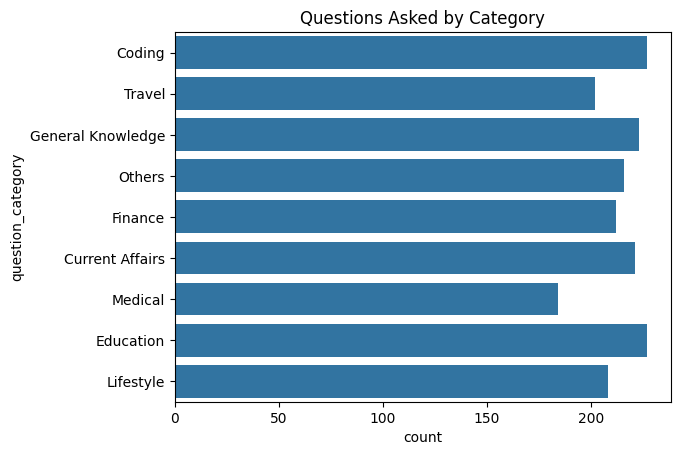

In [47]:
#Question Category Analysis
sns.countplot(data=df, y="question_category")
plt.title("Questions Asked by Category")
plt.show()

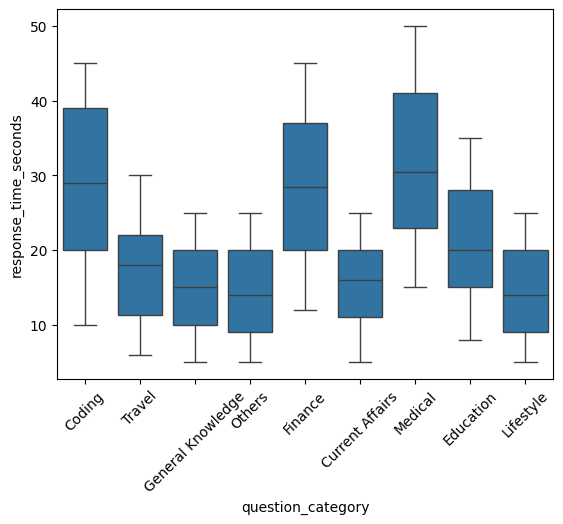

In [48]:
#Response Time Analysis
sns.boxplot(data=df, x="question_category", y="response_time_seconds")
plt.xticks(rotation=45)
plt.show()

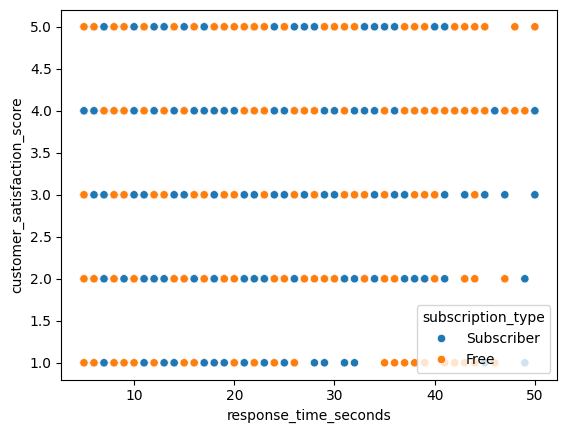

In [49]:
#Satisfaction vs Response Time
sns.scatterplot(
    data=df,
    x="response_time_seconds",
    y="customer_satisfaction_score",
    hue="subscription_type"
)
plt.show()

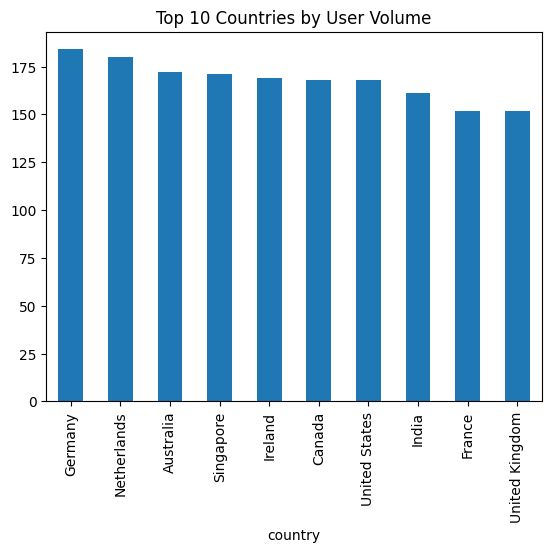

In [50]:
#Geography Insights
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by User Volume")
plt.show()

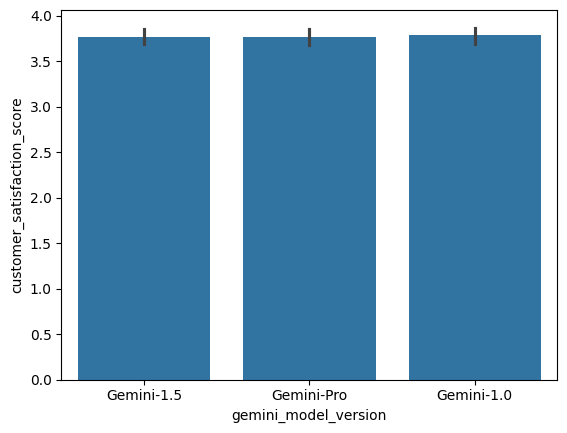

In [51]:
#Device & Model Performance
sns.barplot(
    data=df,
    x="gemini_model_version",
    y="customer_satisfaction_score",
    estimator=np.mean
)
plt.show()

In [52]:
# calculate average satisfaction by subscription type
avg_satisfaction = (
    df.groupby("subscription_type")["customer_satisfaction_score"]
    .mean()
    .round(2)
)

avg_satisfaction


,customer_satisfaction_score
subscription_type,
Free,3.79
Subscriber,3.75


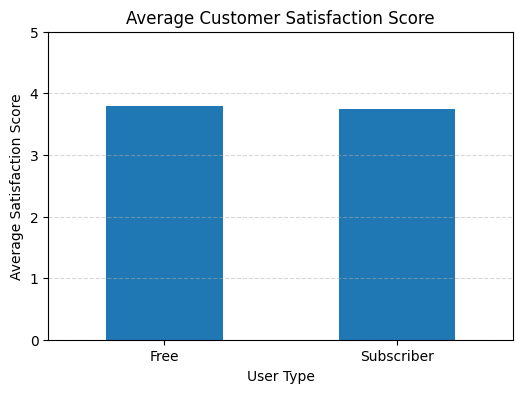

In [53]:
plt.figure(figsize=(6,4))
avg_satisfaction.plot(kind="bar")

plt.title("Average Customer Satisfaction Score")
plt.xlabel("User Type")
plt.ylabel("Average Satisfaction Score")
plt.ylim(0,5)

plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


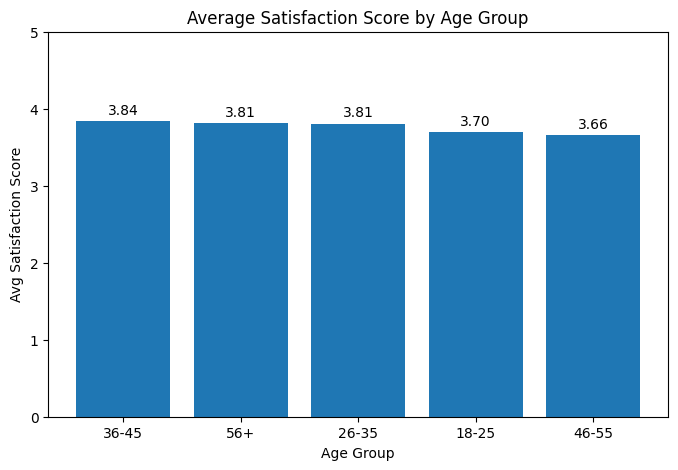

In [54]:
plt.figure(figsize=(8,5))
bars = plt.bar(
    age_satisfaction['age_group'],
    age_satisfaction['customer_satisfaction_score']
)

plt.title('Average Satisfaction Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Satisfaction Score')
plt.ylim(0,5)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()


In [55]:
df.to_csv("Gen_AI_model_cleaned_data.csv", index=False)